In [190]:
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from utilities import boostHistHelpers as hh,input_tools
from wremnants import plot_tools,syst_tools
from wremnants import histselections as sel
import lz4.frame
import pickle
import numpy as np
import hist
import mplhep as hep

In [2]:
%load_ext autoreload
%autoreload 2

In [240]:
with lz4.frame.open("../mz_wlike_with_mu_eta_pt_scetlibMSHT20Corr_msht20.pkl.lz4") as f:
    res = pickle.load(f)

In [143]:
def min_or_max_hist(hvar, syst_ax, indices, do_min=True):
    systax_idx = hvar.axes.name.index(syst_ax)
    view = np.take(hvar.view(flow=True), indices, axis=systax_idx)
    
    op = np.argmin if do_min else np.argmax
    idx = op(view.value, axis=systax_idx)
    # Index by argmin/max because min/max aren't defined for view
    opview = view[(*np.indices(view.shape[:-1]), idx)]
    
    hnew = hvar[{syst_ax : 0}]
    hnew[...] = opview
    return hnew

In [241]:
h = res["ZmumuPostVFP"]["output"]["dilepton_scetlibMSHT20Corr_unc"]

In [168]:
def syst_min_or_max_env_hist(h, proj_ax, syst_ax, indices, no_flow=[], do_min=True):
    if syst_ax in proj_ax:
        proj_ax.pop(syst_ax)
        
    hvar = hh.projectNoFlow(h, proj_ax+[syst_ax], exclude=no_flow)
    return min_or_max_hist(hvar, syst_ax, indices, do_min=do_min)
    

In [233]:
h

Hist(
  Regular(24, 60, 120, name='mll', label='mll'),
  Regular(25, -2.5, 2.5, name='yll', label='yll'),
  Variable(array([  0.  ,   2.  ,   3.  ,   4.  ,   4.75,   5.5 ,   6.5 ,   8.  ,
         9.  ,  10.  ,  12.  ,  14.  ,  16.  ,  18.  ,  20.  ,  23.  ,
        27.  ,  32.  ,  40.  ,  55.  , 100.  , 150.  ]), name='ptll', label='ptll'),
  Integer(0, 1, underflow=False, overflow=False, name='vars', label='vars'),
  storage=Weight()) # Sum: WeightedSum(value=2.02871e+07, variance=2.43813e+07) (WeightedSum(value=2.08345e+07, variance=2.50185e+07) with flow)

In [162]:
resumup,resumdown = syst_envelope_hists(h, ["ptll"], "vars", range(9,44))

In [ ]:
hh.syst_min_or_max_env_hist(h, ["ptll"], "vars", range(5,9)).plot()
#syst_min_or_max_env_hist(h, ["ptll"], "vars", range(9,44)).plot()

In [178]:
h1 = hh.divideHists(up.project("ptll"), hnew[{"vars" : 0}])
h2 = hh.divideHists(down.project("ptll"), hnew[{"vars" : 0}])

ERROR! Session/line number was not unique in database. History logging moved to new session 1622


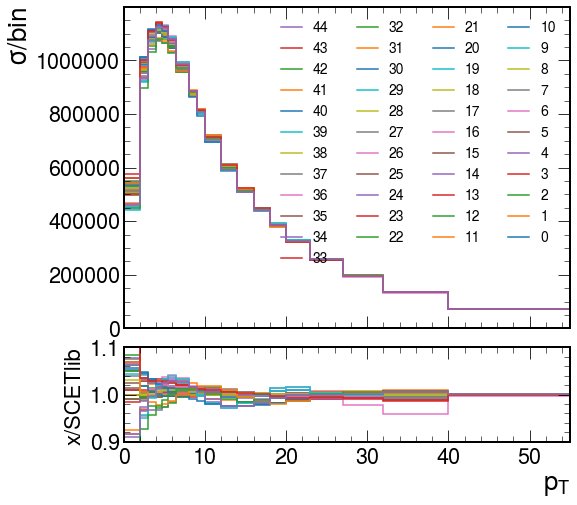

In [242]:
hists = []
for i in range(h.axes["vars"].size):
    hists.append(h[{"vars" : i}].project("ptll"))
fig = plot_tools.makePlotWithRatioToRef(hists, colors=[], labels=[i for i in range(45)], rrange=[0.9, 1.1], xlim=[0,55], ylabel="$\sigma$/bin", xlabel="$p_{T}$", rlabel="x/SCETlib", nlegcols=4, binwnorm=True)

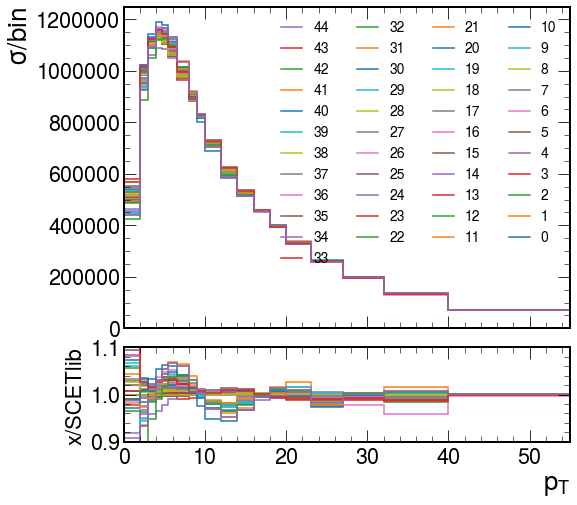

In [243]:
h = res["ZmumuPostVFP"]["output"]["dilepton_scetlibCorr_unc"]
hists = []
for i in range(h.axes["vars"].size):
    hists.append(h[{"vars" : i}].project("ptll"))
fig = plot_tools.makePlotWithRatioToRef(hists, colors=[], labels=[i for i in range(45)], rrange=[0.9, 1.1], xlim=[0,55], ylabel="$\sigma$/bin", xlabel="$p_{T}$", rlabel="x/SCETlib", nlegcols=4, binwnorm=True)

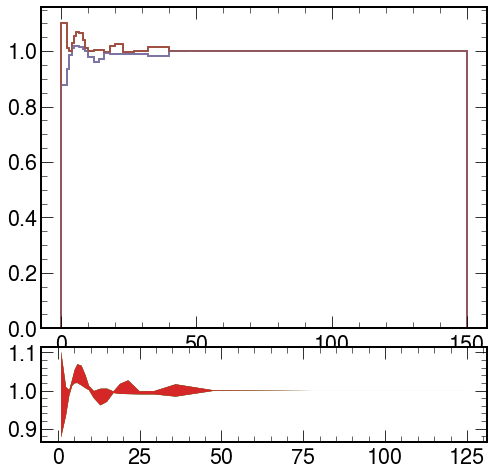

In [212]:
fig

In [220]:
ax1.set_autoscaley_on(True)

In [208]:
np.linspace(0,2,10)

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

(0.0, 50.0)

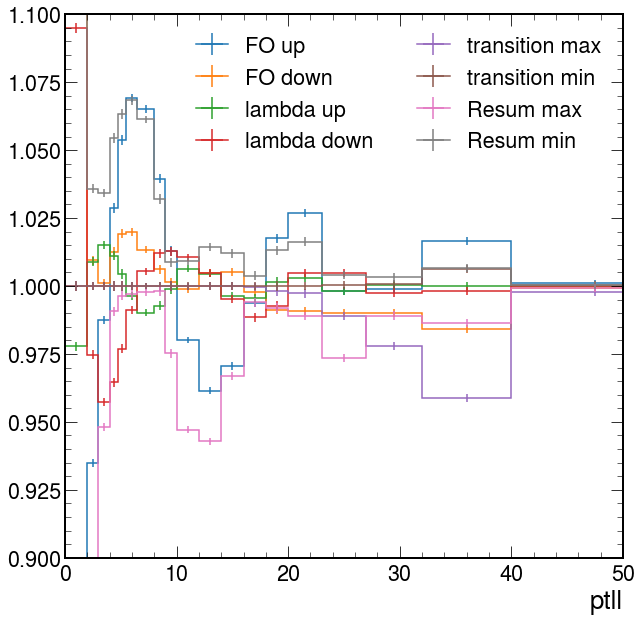

In [167]:
hh.divideHists(hnew[{"vars" : 1}], hnew[{"vars" : 0}]).plot(label="FO up")
hh.divideHists(hnew[{"vars" : 2}], hnew[{"vars" : 0}]).plot(label="FO down")
hh.divideHists(hnew[{"vars" : 3}], hnew[{"vars" : 0}]).plot(label="lambda up")
hh.divideHists(hnew[{"vars" : 4}], hnew[{"vars" : 0}]).plot(label="lambda down")
hh.divideHists(transup, hnew[{"vars" : 0}]).plot(label="transition max")
hh.divideHists(transdown, hnew[{"vars" : 0}]).plot(label="transition min")
hh.divideHists(resumup, hnew[{"vars" : 0}]).plot(label="Resum max")
hh.divideHists(resumdown, hnew[{"vars" : 0}]).plot(label="Resum min")
plt.legend(ncol=2)
plt.ylim([0.9, 1.1])
plt.xlim([0, 50])

In [49]:
idx = np.argmin(vals.value, axis=systax_idx)

In [74]:
vals.ndim

2

In [71]:
vals[np.arange(len(idx)), idx].shape

(23,)

In [143]:
res["ZmumuPostVFP"]["output"]["dilepton_qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j}]

Hist(
  Regular(24, 60, 120, name='mll', label='mll'),
  Regular(25, -2.5, 2.5, name='yll', label='yll'),
  Variable(array([  0.  ,   2.  ,   3.  ,   4.  ,   4.75,   5.5 ,   6.5 ,   8.  ,
         9.  ,  10.  ,  12.  ,  14.  ,  16.  ,  18.  ,  20.  ,  23.  ,
        27.  ,  32.  ,  40.  ,  55.  , 100.  , 150.  ]), name='ptll', label='ptll'),
  storage=Weight()) # Sum: WeightedSum(value=2.09701e+07, variance=2.49308e+07) (WeightedSum(value=2.15602e+07, variance=2.56211e+07) with flow)

(0.9, 1.2)

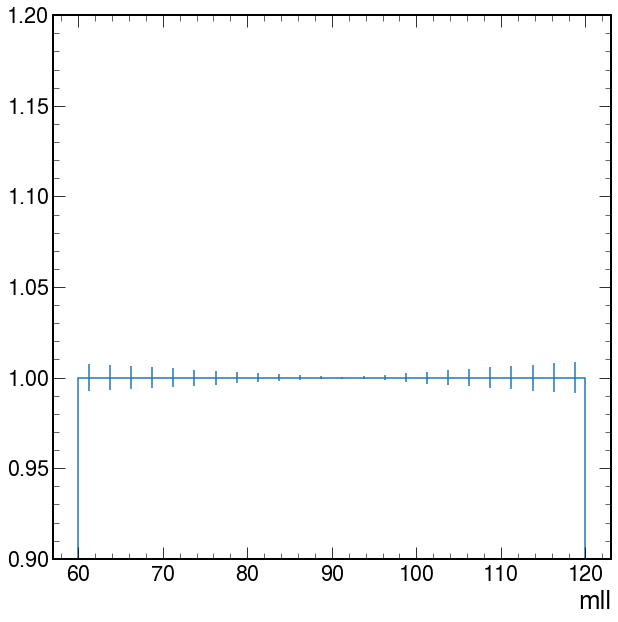

In [9]:
hh.divideHists(res["ZmumuPostVFP"]["output"]["dilepton_qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("mll"),
res["ZmumuPostVFP"]["output"]["dilepton"].project("mll")).plot()
plt.ylim([0.9, 1.2])

In [32]:
res["ZmumuPostVFP"]["output"]["nominal"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 31, 60, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  storage=Weight()) # Sum: WeightedSum(value=1.67237e+07, variance=1.99818e+07) (WeightedSum(value=1.99676e+07, variance=2.36833e+07) with flow)

In [33]:
new["ZmumuPostVFP"]["output"]["nominal"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  storage=Weight()) # Sum: WeightedSum(value=1.80064e+07, variance=2.17366e+07) (WeightedSum(value=2.01869e+07, variance=2.42166e+07) with flow)

In [35]:
new["ZmumuPostVFP"]["output"]["dilepton_qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j}].sum(flow=True)

WeightedSum(value=2.18209e+07, variance=2.62502e+07)

In [36]:
new["ZmumuPostVFP"]["output"]["dilepton"].sum(flow=True)

WeightedSum(value=2.12962e+07, variance=2.56434e+07)

In [65]:
print(new["ZmumuPostVFP"]["output"]["nominal_uncorr"].sum(flow=True))
print(new["ZmumuPostVFP"]["output"]["nominal"].sum(flow=True))

WeightedSum(value=2.01142e+07, variance=2.41883e+07)
WeightedSum(value=2.01869e+07, variance=2.42166e+07)


In [66]:
new["ZmumuPostVFP"]["output"]["qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j}].sum(flow=True)

WeightedSum(value=2.01869e+07, variance=2.42166e+07)

In [40]:
new["ZmumuPostVFP"]["output"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].sum(flow=True)

WeightedSum(value=2.01869e+07, variance=2.35791e+07)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f5305314610>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

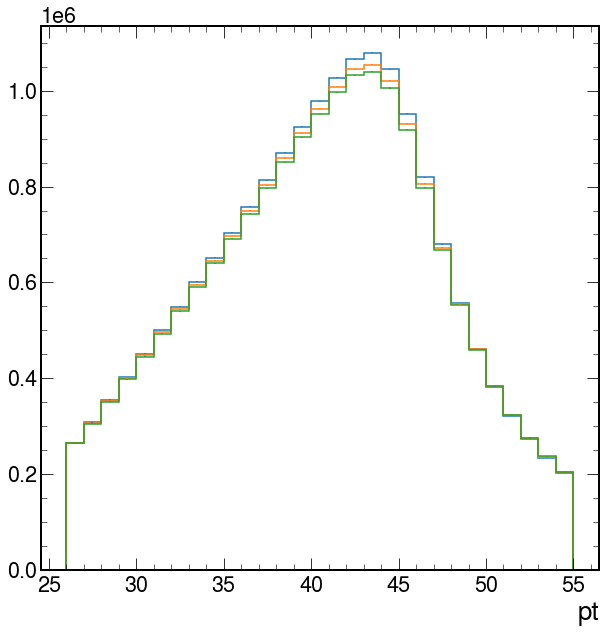

In [48]:
new["ZmumuPostVFP"]["output"]["qcdScale"][{"muRfact" : 2.j, "muFfact" : 2.j}].project("pt").plot()
new["ZmumuPostVFP"]["output"]["nominal"].project("pt").plot()
new["ZmumuPostVFP"]["output"]["qcdScale"][{"muRfact" : 0.5j, "muFfact" : 0.5j}].project("pt").plot()



In [79]:
h = input_tools.read_and_scale("../mz_wlike_with_mu_eta_pt_scetlibVarsCorr_nnpdf31.pkl.lz4", "ZmumuPostVFP", "nominal")*new["dataPostVFP"]["lumi"]*1000


In [80]:
hscale = input_tools.read_and_scale("../mz_wlike_with_mu_eta_pt_scetlibVarsCorr_nnpdf31.pkl.lz4", "ZmumuPostVFP", "qcdScale")*new["dataPostVFP"]["lumi"]*1000

(0.99, 1.01)

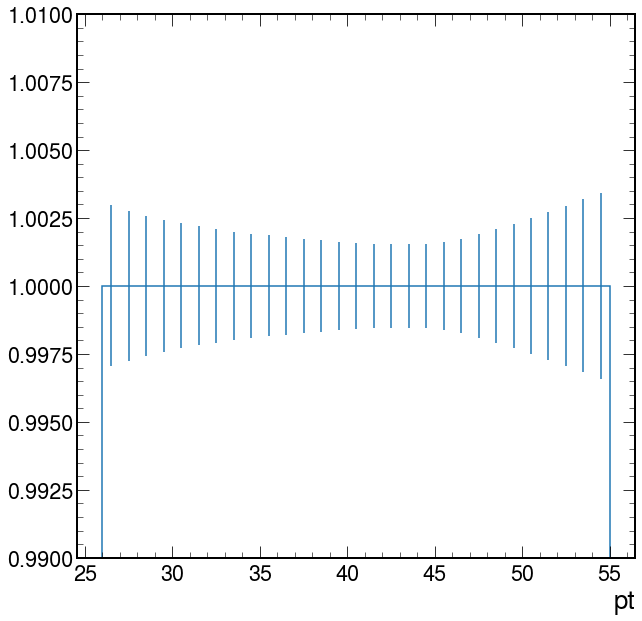

In [74]:
hh.divideHists(hh.projectNoFlow(h, "pt"), hh.projectNoFlow(hscale[{"muRfact" : 1.j, "muFfact" : 1.j}], "pt", ["ptVgen", "chargeVgen"])).plot()
plt.ylim([0.99, 1.01])

In [82]:
h

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  storage=Weight()) # Sum: WeightedSum(value=7.58973e+06, variance=3.86183e+06) (WeightedSum(value=8.50881e+06, variance=4.30243e+06) with flow)

In [86]:
hh.projectNoFlow(hscale[{"muRfact" : 1.j, "muFfact" : 1.j}], "pt", ["ptVgen"])

Hist(Regular(29, 26, 55, name='pt', label='pt'), storage=Weight()) # Sum: WeightedSum(value=7.58973e+06, variance=3.86183e+06) (WeightedSum(value=8.50881e+06, variance=4.30243e+06) with flow)

In [118]:
h, hscale = input_tools.read_all_and_scale("../mz_wlike_with_mu_eta_pt_scetlibVarsCorr_nnpdf31.pkl.lz4", ["ZmumuPostVFP"], ["nominal", "qcdScale"], lumi=True)



In [120]:
hscale[{"muRfact" : 1.j, "muFfact" : 1.j}]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Variable([0, 2.95, 4.73, 6.68, 8.98, 11.78, 15.33, 20.11, 27.17, 40.15, 120], underflow=False, name='ptVgen', label='ptVgen'),
  Integer(0, 1, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  storage=Weight()) # Sum: WeightedSum(value=7567.6, variance=3.85192) (WeightedSum(value=8508.81, variance=4.30243) with flow)

In [121]:
h

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  storage=Weight()) # Sum: WeightedSum(value=7589.73, variance=3.86183) (WeightedSum(value=8508.81, variance=4.30243) with flow)